### What is statistical inference?

* Broadly speaking, it is the process which involves taking our data to probabilistic conclusions about what we might expect if we collected the same data or took even more data, and we can make decisions based on these conclusions.
* The data speaks in the language of probability which _precisely_ describes _uncertainty_.

### Story 1: How many times of getting 4 heads of out 4 flips, given that 'heads' has 50% chance of happening.
### Let's think of simulating a coin flip
- A coin flip (a simulated experiment) where the result is either True/1 (Heads) or False/0 (Tails) is referred to as a Bernoulli trial
- We randomly draw a number between 0 and 1
    - If the number we draw is less than 0.5 (which has 50% chance of happening), we say we got Heads
    - Otherwise, we got Tails

In [49]:
import numpy as np
np.random.seed(123)
# A bernoulli trial
def perform_coin_flip_trial(n, p):
    # generate 4 random numbers for 4 coin flips
    random_number = np.random.random(size=n)
    heads = random_number < p
    return int(np.sum(heads)==4)
(n,p) = (4, 0.5)
res = perform_coin_flip_trial(n, p)
print('The number of times we got 4 heads out of {0} flips is {1}'.format(n, res))

The number of times we got 4 heads out of 4 flips is 0


#### If we repeat the Bernoulli trial (4 coin flips) 1000 times, then what will the result look like?
- Each trial is 4 coin flips and we have 1000 trials

In [47]:
import numpy as np
# for the reproducible purpose
np.random.seed(123)
# initialize the number of getting 4 heads out of 4 flips for 1000 trials
num_trials = 1000
n = 4
p = 0.5
n_four_heads = np.zeros(num_trials)

for i in range(num_trials):
    n_four_heads[i] = perform_coin_flip_trial(n, p)

res = np.sum(n_four_heads)/num_trials
print('The probability of getting 4 heads out of {0} flips, repeated {1} times, is {2}'.format(n, num_trials, res))

The probability of getting 4 heads out of 4 flips, repeated 1000 times, is 0.058


### Story 2: let's say a school gave 60 students a test. They would like to know the number of passed students, given that the probability of passing the test is _p_ = 0.2.
### To investigate this, we will do a simulation:
- For each student, we randomly draw a number between 0 and 1. If the number we draw is less than _p_=0.2 we say the student passes the test, otherwise the student fails
- Each student is regarded as _a Bernoulli trial_ as the experiment where the result is either 1 (passed) or 0 (failed) is referred to as _a Bernoulli trial_
- In our experiment, there are 60 students. Therefore we will perform _n_=60 Bernoulii trials corresponding to 60 students
- Here is when statistical inference comes into play: the school would like to examine the performance of **other** 60 students. That means we will do this for another 50 Bernoulli trials. And again and again until we have tried it _t_ times/trials.

In [2]:
def ecdf(data):
    x = sorted(data)
    y = np.arange(1,len(data)+1)/len(data)
    return x, y

With one simulation experiment, there are 6 out of 60 students who passed the test


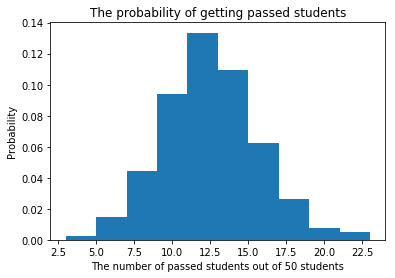

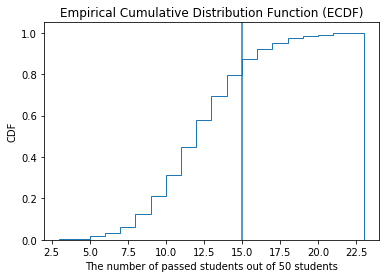

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# for the reproducible purpose
np.random.seed(123)
num_trials = 1000
n = 60
p = 0.2
n_passed_students = np.empty(num_trials)

# For 1 trial
def perform_bernoulli_trial(n, p):
    n_success = 0
    # generate n random numbers corresponding to n students we examine
    random_number = np.random.random(size=n)
    # count the number of successes, that is less that probability p     
    n_success = np.sum(random_number < p)
    return n_success
print('With one simulation experiment, there are {0} out of {1} students who passed the test'
      .format(perform_bernoulli_trial(n, p), n))


for i in range(num_trials):
    n_passed_students[i] = perform_bernoulli_trial(n, p)

# Here we plot the histogram describing the number of passed students
_ = plt.hist(n_passed_students, normed = True)
_ = plt.xlabel('The number of passed students out of 50 students')
_ = plt.ylabel('Probability')
_ = plt.title('The probability of getting passed students')
plt.show()

# If the school requires at least 15 passed students
POINTS_THRESHOLD = 15
_ = plt.hist(n_passed_students, normed=True, cumulative=True, histtype='step', bins=100)
_ = plt.axvline(x=POINTS_THRESHOLD)
_ = plt.xlabel('The number of passed students out of 50 students')
_ = plt.ylabel('CDF')
_ = plt.title('Empirical Cumulative Distribution Function (ECDF)')


Based on the ECDF above we notice that the school has about 20% chance of obtaining that the threshold of 15 passed students.

In [67]:
# Verify
prob = np.sum(n_passed_students>=POINTS_THRESHOLD)/num_trials
print('The probability of getting 15 passed students among 60 students is {0}'.format(prob))

The probability of getting 15 passed students among 60 students is 0.202


### The two stories above are referred to as *Binomial Distribution*: the number of _r_ successes in _n_ Bernoulli trials with probability _p_ of success
- In the first story: the number of heads (successes) in _n_=4 Bernoulli trials (coin flips) with probability _p_=0.5 of heads
- In the second story: the number of passed students (successes) in _n_=60 Bernoulli trials (students' tests) with probability _p_=0.2 of being passed

Story 1 is re-written like this:

The probability of getting 4 heads out of 4 flips is 0.06294


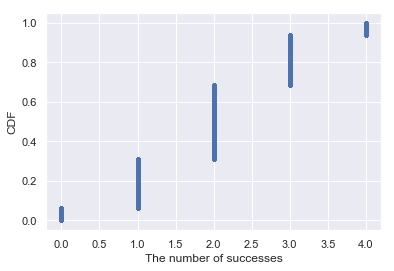

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(123)
num_trials = 100000
(n, p) = (4, 0.5)
samples = np.random.binomial(n, p, size=num_trials)
np.sum(samples==4)
print('The probability of getting {0} heads out of {1} flips is {2}'.format(n, n, np.sum(samples==4)/num_trials))

sns.set()
x, y = ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel("The number of successes")
_ = plt.ylabel("CDF")
plt.show()

Story 2 is re-written:

The probability of getting at least 15 successful students out of 60 flips is 0.20591


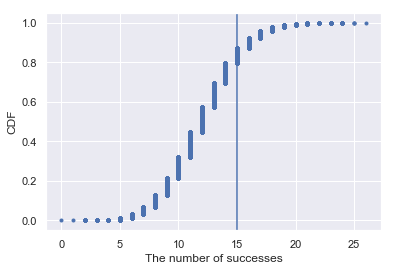

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(123)
num_trials = 100000
(n, p) = (60, 0.2)
samples = np.random.binomial(n, p, size=num_trials)

def ecdf(data):
    x = sorted(data)
    y = np.arange(1,len(data)+1)/len(data)
    return x, y


POINTS_THRESHOLD = 15
print('The probability of getting at least {0} successful students out of {1} flips is {2}'
      .format(POINTS_THRESHOLD, n, np.sum(samples>=POINTS_THRESHOLD)/num_trials))
x, y = ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.axvline(x=POINTS_THRESHOLD)
_ = plt.xlabel("The number of successes")
_ = plt.ylabel("CDF")
plt.show()